In [ ]:
import sys
from pathlib import Path

src_path = Path("..")
sys.path.append(str(src_path.resolve()))

import matplotlib.pyplot as plt
import numpy as np

# from IPython.display import Audio
from src.helpers import read_json
from src.pipeline import VideoDubPipe

%matplotlib inline

/home/alexbarrow/proj/video-dubbing-dls-project/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
device = "cuda"
speaker_wav = "../data/speaker_sample.wav"

# temp_pipe_asr_mt(ted_audio, "../data/wav_chunks")

ch_json = read_json("../notebooks/new_test_2025-07-09 16:15:39.339660.json")
ted_audio = "/home/alexbarrow/proj/video-dubbing-dls-project/data/output_ted_audio.wav"
all_data = "/home/alexbarrow/proj/video-dubbing-dls-project/data/wav_chunks/all_data_2025-07-09 09:48:20.448383.json"
dub = VideoDubPipe(ch_json, speaker_wav)

In [ ]:
final_chunks = dub.transform(".")

/home/alexbarrow/proj/video-dubbing-dls-project/src/helpers.py:68: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  torch.Tensor([audio]), sample_rate, effects=[['tempo', str(rate)]]


In [ ]:
orig_len, synth_len = [], []
for chunk in final_chunks.values():
    if not chunk["speech_boundary"]:
        continue
    orig = chunk["speech_boundary"][0]["end"] - chunk["speech_boundary"][0]["start"]
    synth = len(chunk["tts_result"]) / 24000
    diff = synth - orig
    synth_len.append(synth)

len(orig_len) == len(synth_len)

True

### Сравнение длительности

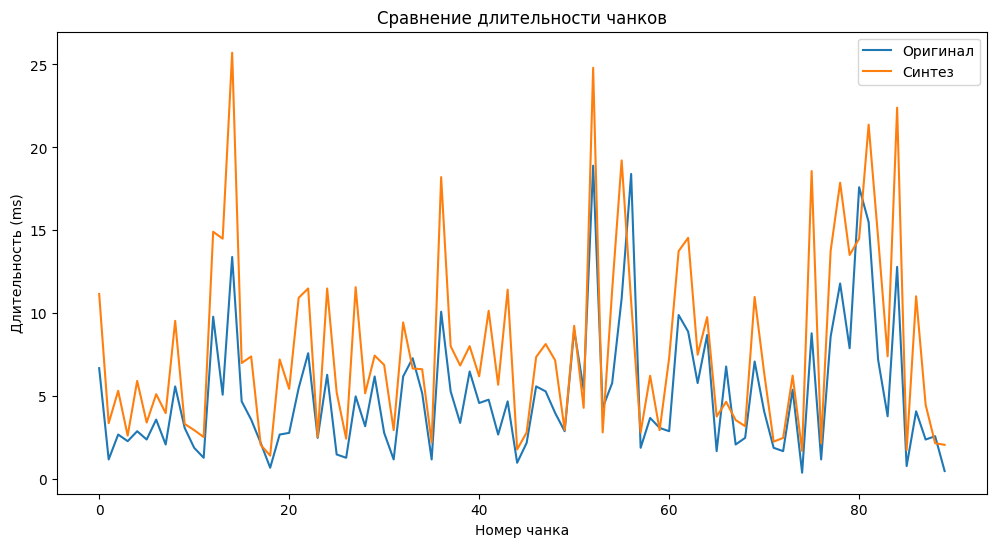

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(orig_len, label="Оригинал")
plt.plot(synth_len, label="Синтез")
plt.title("Сравнение длительности чанков")
plt.xlabel("Номер чанка")
plt.ylabel("Длительность (ms)")
plt.legend()
plt.show()

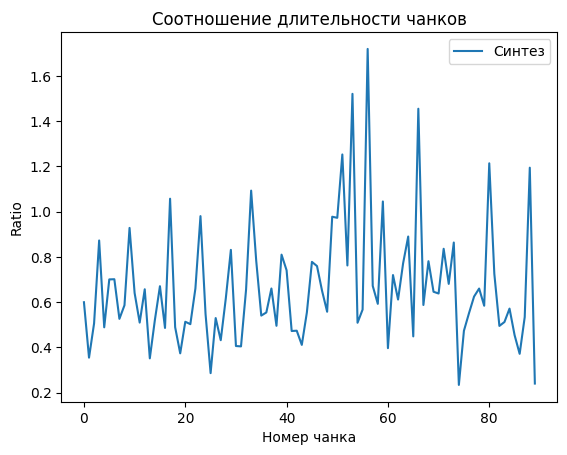

In [20]:
ratio = np.array(orig_len) / np.array(synth_len)
plt.plot(ratio, label="Синтез")
plt.title("Соотношение длительности чанков")
plt.xlabel("Номер чанка")
plt.ylabel("Ratio")
plt.legend()
plt.show()

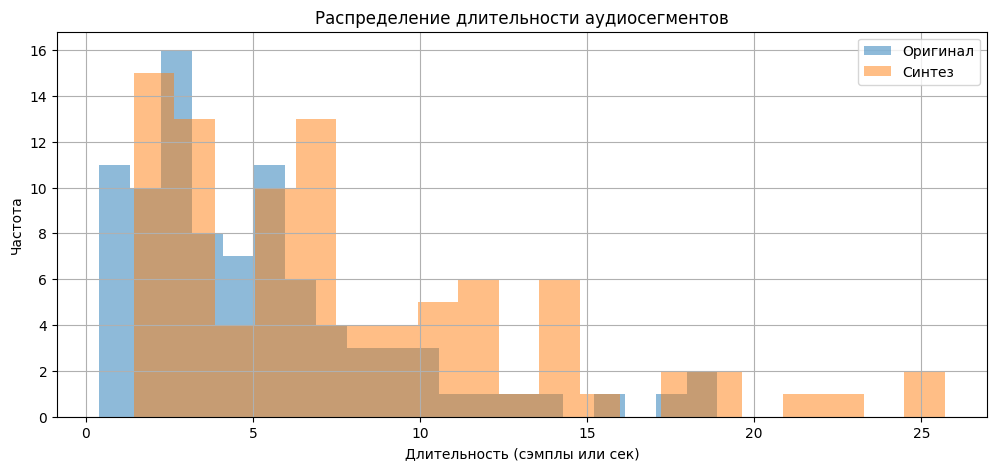

In [ ]:
plt.figure(figsize=(12, 5))
plt.hist(orig_len, bins=20, alpha=0.5, label="Оригинал")
plt.hist(synth_len, bins=20, alpha=0.5, label="Синтез")
plt.title("Распределение длительности аудиосегментов")
plt.xlabel("Длительность (сэмплы или сек)")
plt.ylabel("Частота")
plt.legend()
plt.grid(True)
plt.show()

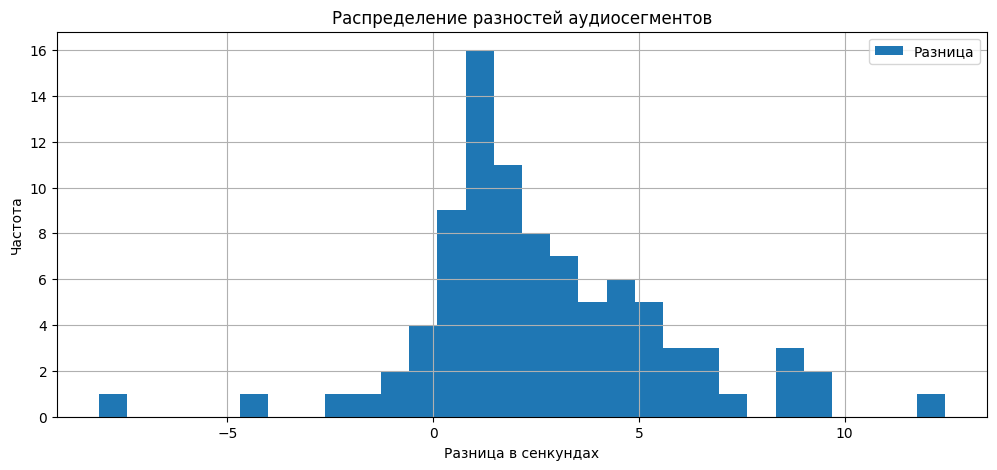

In [68]:
dif_len = np.array(synth_len) - np.array(orig_len)
plt.figure(figsize=(12, 5))
plt.hist(
    dif_len,
    bins=30,
    label="Разница",
)
plt.title("Распределение разностей аудиосегментов")
plt.xlabel("Разница в сенкундах")
plt.ylabel("Частота")
plt.legend()
plt.grid(True)
plt.show()

In [69]:
dif_len.max()

np.float64(12.431333333333335)

In [36]:
dif_len.mean()

np.float64(2.777155555555556)